In [6]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

%matplotlib inline

JPGE_IMAGES_DIR = "../datasets/VOC2012/JPEGImages/"
SEGMENTATION_CLASS_DIR = "../datasets/VOC2012/SegmentationClass/"
SEGMENTATION_SETS_DIR = "../datasets/VOC2012/SegmentationSets/"

TRAIN_SET_DIR = "../datasets/HUMANS/train/"
VALIDATION_SET_DIR = "../datasets/HUMANS/validation/"

PERSON_COLOR = (192, 128, 128) # RGB

In [113]:
def get_person_mask(im):
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    mask = (im_rgb[:,:,0] == PERSON_COLOR[0]) & (im_rgb[:,:,1] == PERSON_COLOR[1]) & (im_rgb[:,:,2] == PERSON_COLOR[2])
    mask = mask.astype(np.uint8)
    return mask

## Test Mask

../datasets/VOC2012/SegmentationClass/2007_000170.png


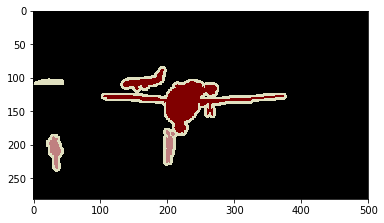

In [117]:
im = cv2.imread(os.path.join(SEGMENTATION_CLASS_DIR, "2007_000032.png"))
print(os.path.join(SEGMENTATION_CLASS_DIR, "2007_000170.png"))
plt.imshow(im[..., ::-1])

## Load Mask

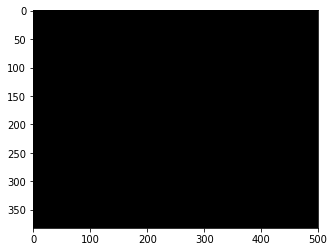

In [65]:
mask = cv2.imread(os.path.join(TRAIN_SET_DIR, "segmented", "2007_003876.png"), 0) * 255
plt.imshow(mask, cmap='gray')

# Create Sets

In [139]:
def create_dataset(train_file, output_base_dir):
    with open(train_file) as f:
        for line in f:
            line = line.rstrip('\r\n')
            jpge_image_dir = os.path.join(JPGE_IMAGES_DIR, line + '.jpg')

            mask_image = cv2.imread(os.path.join(SEGMENTATION_CLASS_DIR, line + '.png'))
            mask_image = get_person_mask(mask_image)

            shutil.copyfile(jpge_image_dir, os.path.join(output_base_dir, 'jpge', line + '.jpg'))
            cv2.imwrite(os.path.join(output_base_dir, 'segmented', line + '.png'), mask_image)

## Create Train Set

In [140]:
create_dataset(os.path.join(SEGMENTATION_SETS_DIR, 'train.txt'), TRAIN_SET_DIR)

## Create Validation Set

In [141]:
create_dataset(os.path.join(SEGMENTATION_SETS_DIR, 'val.txt'), VALIDATION_SET_DIR)

## Edit Dataset

In [21]:
images = glob.glob(os.path.join('../datasets/HUMANS/train2/', 'jpge/*'))
for image in images:
    base_image, _ = os.path.splitext(os.path.basename(image))
    from_image = os.path.join('../datasets/HUMANS/train/segmented', base_image + '.png')
    to_image = os.path.join('../datasets/HUMANS/train2/segmented', base_image + '.png')
    shutil.move(from_image, to_image)

In [24]:
images = glob.glob(os.path.join('../datasets/HUMANS/validation2/', 'jpge/*'))
for image in images:
    base_image, _ = os.path.splitext(os.path.basename(image))
    from_image = os.path.join('../datasets/HUMANS/validation/segmented', base_image + '.png')
    to_image = os.path.join('../datasets/HUMANS/validation2/segmented', base_image + '.png')
    shutil.move(from_image, to_image)

## Visualize Masks

In [36]:
images = glob.glob(os.path.join('../datasets/HUMANS/train/', 'segmented/*'))
for image in images:
    base_name = os.path.basename(image)
    im = cv2.imread(image, 0) * 255
    cv2.imwrite(os.path.join('../datasets/HUMANS/train/grayscale_mask', base_name), im)

## Compete the Training dataset

In [48]:
images = glob.glob(os.path.join('../datasets/HUMANS/validation/', 'jpge/*'))[0:181]

In [49]:
for image in images:
    base_name, _ = os.path.splitext(os.path.basename(image))
    from_image = os.path.join('../datasets/HUMANS/validation/jpge/', base_name + '.jpg')
    to_image = os.path.join('../datasets/HUMANS/train/jpge/', base_name + '.jpg')
    
    from_segmented = os.path.join('../datasets/HUMANS/validation/segmented/', base_name + '.png')
    to_segmented = os.path.join('../datasets/HUMANS/train/segmented/', base_name + '.png')
    
    shutil.move(from_image, to_image)
    shutil.move(from_segmented, to_segmented)

## Misc

In [66]:
images = [os.path.splitext(os.path.basename(image))[0] for image in glob.glob(os.path.join('../datasets/HUMANS/validation/', 'jpge/*'))]
segmented = [os.path.splitext(os.path.basename(image))[0] for image in glob.glob(os.path.join('../datasets/HUMANS/validation/', 'segmented/*'))]

In [70]:
for image in segmented:
    if image not in images:
        shutil.move(os.path.join('../datasets/HUMANS/validation/segmented', image + '.png'),
                   os.path.join('../datasets/HUMANS/validation/', image + '.png'))